In [153]:
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
# import moss
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
from matplotlib.ticker import PercentFormatter
from statsmodels.stats.anova import AnovaRM
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import get_cmap
from plot_utils import combined_rolling_average_and_model_fit, combined_sliding_window_and_model_fit_split_col
from common_functions import remove_unit_variance

In [154]:
df_enhanced_wm = pd.read_csv('enhanced_df.csv')

df_matched = pd.read_csv('pilot_total_ltm_stats/TEST_wm_ltm_p_pilot_total.csv')
df_wm_models = pd.read_csv("df_total_p_pilot_total_TEST.csv")

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_57289/536199682.py:4: DtypeWarning: Columns (255,256,257,258,259,260) have mixed types. Specify dtype option on import or set low_memory=False.
  df_wm_models = pd.read_csv("df_total_p_pilot_total_TEST.csv")


In [169]:
df_matched['it_ltm_diff'].min()

-1.227143661

In [139]:
df_enhanced['p_values_it_flipped_ltm']

0        0.229933
1        0.287456
2        0.254471
3        0.241424
4        0.236079
           ...   
15008    0.285244
15009    0.247322
15010    0.285244
15011    0.260808
15012    0.280671
Name: p_values_it_flipped_ltm, Length: 15013, dtype: float64

In [103]:
df_matched['p_values_it_flipped_ltm']

0        0.359920
1        0.355233
2        0.406179
3        0.374207
4             NaN
           ...   
15008    0.346324
15009    0.426101
15010    0.346324
15011    0.393060
15012    0.372157
Name: p_values_it_flipped_ltm, Length: 15013, dtype: float64

In [104]:
df_wm_models['p_values_it_flipped']

0        0.274200
1        0.274200
2        0.274200
3        0.274200
4        0.274200
           ...   
80632    0.247442
80633    0.247442
80634    0.247442
80635    0.247442
80636    0.247442
Name: p_values_it_flipped, Length: 80637, dtype: float64

In [105]:
df_wm_models['Tested - Untested IT Distractor Similarity']


0        1.071866
1       -0.832142
2       -0.358048
3        1.088834
4        1.086896
           ...   
80632    1.220836
80633   -0.234965
80634   -1.099472
80635   -0.248842
80636    0.850145
Name: Tested - Untested IT Distractor Similarity, Length: 80637, dtype: float64

In [106]:
import os
import pickle

def load_model_fits(filename):
    """Load model fits from pickle or json file"""
    pickle_file = f"{filename}.pkl"
    json_file = f"{filename}.json"
    
    if os.path.exists(pickle_file):
        with open(pickle_file, 'rb') as f:
            return pickle.load(f)
    elif os.path.exists(json_file):
        with open(json_file, 'r') as f:
            return json.load(f)
    else:
        raise FileNotFoundError(f"Neither {pickle_file} nor {json_file} found")
model_fits_it = load_model_fits('experiment_accuracy_fits_it')


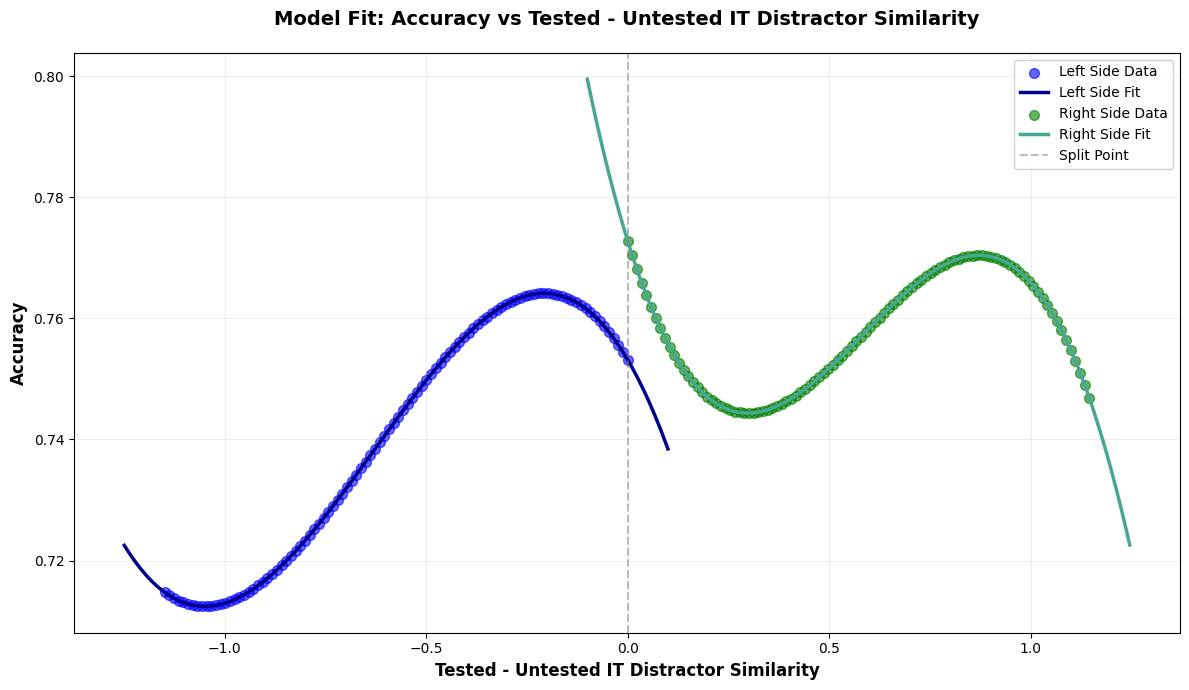

=== Model Information ===

Model orders - Left: 3, Right: 3

Left side:
  Points used in fit: 46
  Total points available: 91
  Polynomial coefficients: [-0.17325445698161693, -0.32663772068328706, -0.11313166600770598, 0.7531896155641523]

Right side:
  Points used in fit: 45
  Total points available: 91
  Polynomial coefficients: [-0.27650136651466656, 0.4851591700440949, -0.21557662722823018, 0.7728326067549836]


In [107]:

def plot_model_fits(model_fits_data, row_name='row_1', figsize=(12, 7)):
    
    row_data = model_fits_data[row_name]
    config = row_data['config']
    model_fits = row_data['model_fits']
    fig, ax = plt.subplots(figsize=figsize)
    
    if 'left_side' in model_fits:
        left_data = model_fits['left_side']['all_data']
        
        ax.scatter(left_data['x_values'], left_data['y_values'], 
                   alpha=0.6, s=50, label='Left Side Data', color='blue')
        
        ax.plot(left_data['extended_x_values'], left_data['extended_y_values'],
                linewidth=2.5, label='Left Side Fit', color='darkblue')
    
    if 'right_side' in model_fits:
        right_data = model_fits['right_side']['all_data']
        
        color = right_data.get('color', '#49a791')
        
        ax.scatter(right_data['x_values'], right_data['y_values'], 
                   alpha=0.6, s=50, label='Right Side Data', color='green')
        
        ax.plot(right_data['extended_x_values'], right_data['extended_y_values'],
                linewidth=2.5, label='Right Side Fit', color=color)
    
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5, linewidth=1.5, label='Split Point')
    
    ax.set_xlabel(config['x_col'], fontsize=12, fontweight='bold')
    ax.set_ylabel(config['y_col'], fontsize=12, fontweight='bold')
    ax.set_title(f"Model Fit: {config['y_col']} vs {config['x_col']}", 
                 fontsize=14, fontweight='bold', pad=20)
    
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    ax.legend(loc='best', fontsize=10, framealpha=0.9)
    
    plt.tight_layout()
    
    return fig, ax

fig, ax = plot_model_fits(model_fits_it)
plt.show()

print("=== Model Information ===")
row_data = model_fits_it['row_1']
config = row_data['config']
model_fits = row_data['model_fits']

print(f"\nModel orders - Left: {config['model_orders']['left']}, Right: {config['model_orders']['right']}")

if 'left_side' in model_fits:
    left_data = model_fits['left_side']['all_data']
    print(f"\nLeft side:")
    print(f"  Points used in fit: {left_data.get('points_used_in_fit', 'N/A')}")
    print(f"  Total points available: {left_data.get('total_points_available', 'N/A')}")
    print(f"  Polynomial coefficients: {left_data.get('model_coefficients', 'N/A')}")

if 'right_side' in model_fits:
    right_data = model_fits['right_side']['all_data']
    print(f"\nRight side:")
    print(f"  Points used in fit: {right_data.get('points_used_in_fit', 'N/A')}")
    print(f"  Total points available: {right_data.get('total_points_available', 'N/A')}")
    print(f"  Polynomial coefficients: {right_data.get('model_coefficients', 'N/A')}")

In [164]:
import pandas as pd

def create_dataframe_from_model_fits(model_fits_data, row_name='row_1'):

    row_data = model_fits_data[row_name]
    model_fits = row_data['model_fits']
    
    all_data = []
    all_fit = []
    
    if 'left_side' in model_fits:
        left_data = model_fits['left_side']['all_data']
        
        for x, y in zip(left_data['x_values'], left_data['y_values']):
            all_data.append({'x': x, 'y': y, 'side': 'left'})
        
        for x, y in zip(left_data['extended_x_values'], left_data['extended_y_values']):
            all_fit.append({'x': x, 'y': y, 'side': 'left'})
    
    if 'right_side' in model_fits:
        right_data = model_fits['right_side']['all_data']
        
        for x, y in zip(right_data['x_values'], right_data['y_values']):
            all_data.append({'x': x, 'y': y, 'side': 'right'})
        
        for x, y in zip(right_data['extended_x_values'], right_data['extended_y_values']):
            all_fit.append({'x': x, 'y': y, 'side': 'right'})
    
    df_data = pd.DataFrame(all_data)
    df_fit = pd.DataFrame(all_fit)
    
    return df_data, df_fit

df_data, df_fit = create_dataframe_from_model_fits(model_fits_it)

print("=== Actual Data Points DataFrame ===")
print(f"Shape: {df_data.shape}")
print(df_data.head(10))
print(f"\n{df_data.tail(10)}")

print("\n\n=== Fitted Curve Points DataFrame ===")
print(f"Shape: {df_fit.shape}")
print(df_fit.head(10))
print(f"\n{df_fit.tail(10)}")

print("\n\n=== Summary Statistics ===")
print("\nActual Data Points:")
print(df_data.groupby('side').describe())

print("\nFitted Curve Points:")
print(df_fit.groupby('side').describe())

=== Actual Data Points DataFrame ===
Shape: (200, 3)
          x         y  side
0 -1.148873  0.714756  left
1 -1.137268  0.714228  left
2 -1.125663  0.713770  left
3 -1.114058  0.713383  left
4 -1.102453  0.713063  left
5 -1.090849  0.712810  left
6 -1.079244  0.712622  left
7 -1.067639  0.712497  left
8 -1.056034  0.712433  left
9 -1.044430  0.712429  left

            x         y   side
190  1.041799  0.762167  right
191  1.053375  0.760900  right
192  1.064951  0.759530  right
193  1.076526  0.758052  right
194  1.088102  0.756465  right
195  1.099677  0.754767  right
196  1.111253  0.752954  right
197  1.122828  0.751023  right
198  1.134404  0.748974  right
199  1.145979  0.746802  right


=== Fitted Curve Points DataFrame ===
Shape: (400, 3)
          x         y  side
0 -1.248873  0.722498  left
1 -1.242094  0.721781  left
2 -1.235316  0.721094  left
3 -1.228538  0.720435  left
4 -1.221759  0.719805  left
5 -1.214981  0.719204  left
6 -1.208203  0.718630  left
7 -1.201425  0.71

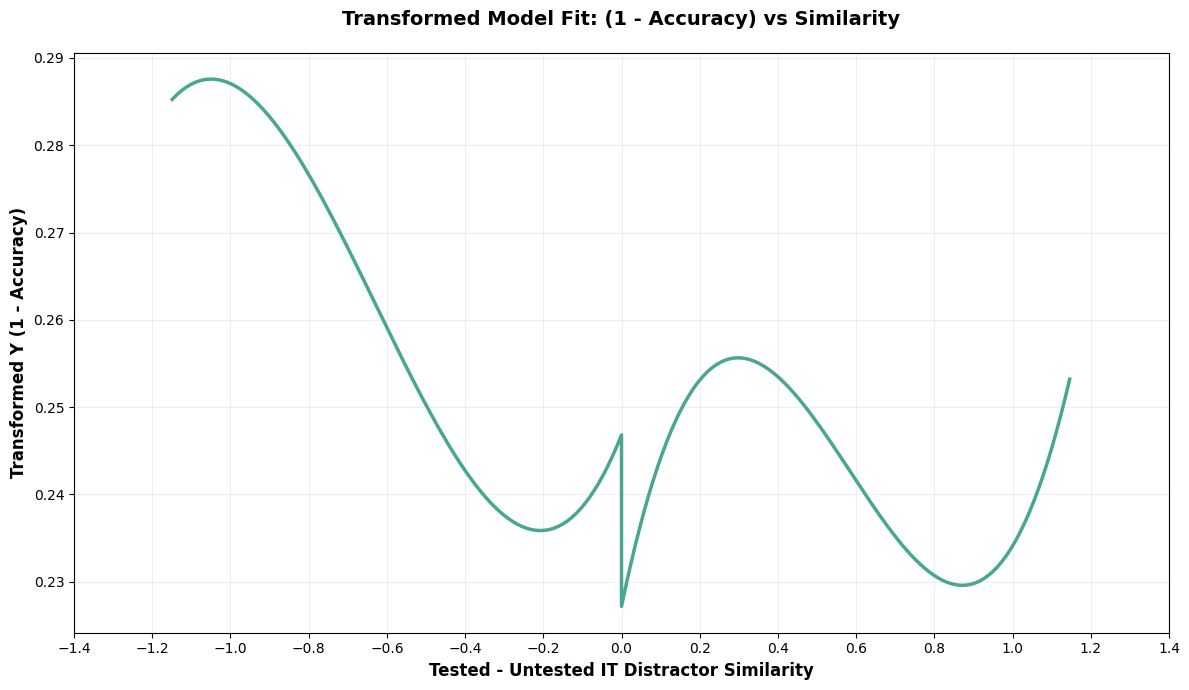

In [167]:
import numpy as np

df_data['y'] = 1 - df_data['y']
# Plot the transformed data (all points together)
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(df_data['x'], df_data['y'], 
        linewidth=2.5, color='#49a791')

# Set custom x-axis ticks from -1.4 to 1.4 with 0.2 step
ax.set_xticks(np.arange(-1.4, 1.4 + 0.2, 0.2))
ax.set_xlim(-1.4, 1.4)  # Optional: set the actual axis limits too

# # Or set custom y-axis ticks (if that's what you need)
# ax.set_yticks(np.arange(-1.4, 1.4 + 0.2, 0.2))
# ax.set_ylim(-1.4, 1.4)

ax.set_xlabel('Tested - Untested IT Distractor Similarity', fontsize=12, fontweight='bold')
ax.set_ylabel('Transformed Y (1 - Accuracy)', fontsize=12, fontweight='bold')
ax.set_title('Transformed Model Fit: (1 - Accuracy) vs Similarity', 
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

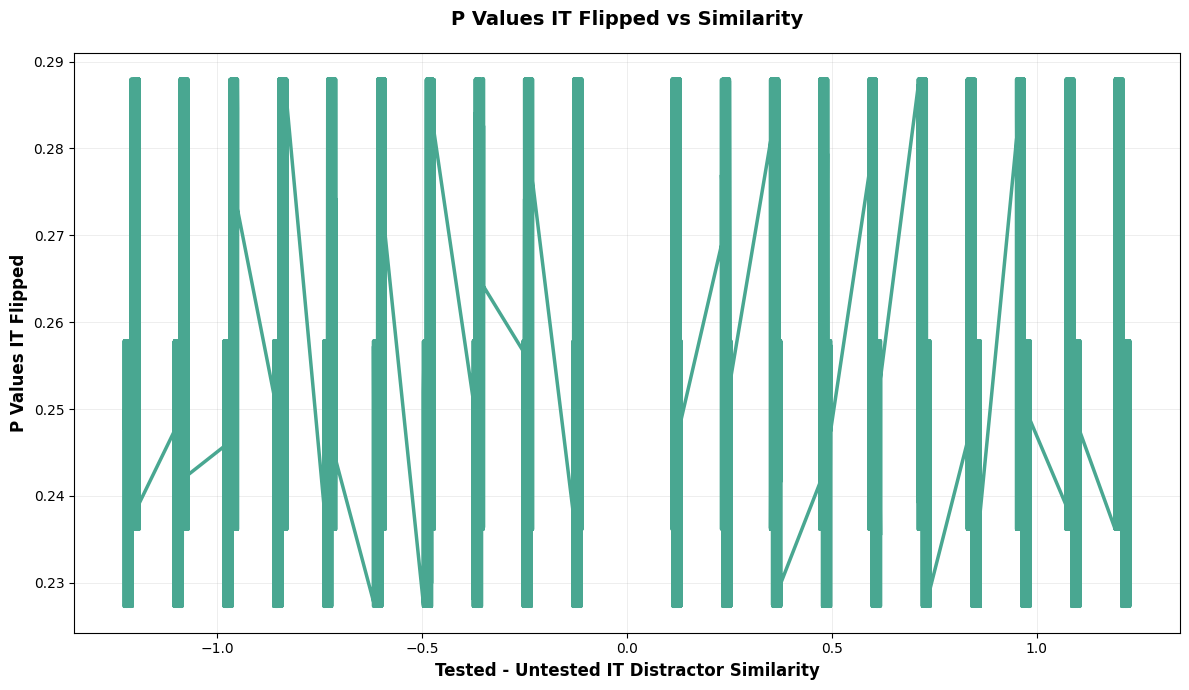

Left side points: 40584
Right side points: 40053


In [110]:
import matplotlib.pyplot as plt

# Separate left and right sides
df_left = df_wm_models[df_wm_models['Tested - Untested IT Distractor Similarity'] < 0].sort_values('Tested - Untested IT Distractor Similarity')
df_right = df_wm_models[df_wm_models['Tested - Untested IT Distractor Similarity'] >= 0].sort_values('Tested - Untested IT Distractor Similarity')

# Create plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plot left side
if not df_left.empty:
    ax.plot(df_left['Tested - Untested IT Distractor Similarity'], 
            df_left['p_values_it_flipped'], 
            linewidth=2.5, color='#49a791')

# Plot right side
if not df_right.empty:
    ax.plot(df_right['Tested - Untested IT Distractor Similarity'], 
            df_right['p_values_it_flipped'], 
            linewidth=2.5, color='#49a791')

# Labels and title
ax.set_xlabel('Tested - Untested IT Distractor Similarity', fontsize=12, fontweight='bold')
ax.set_ylabel('P Values IT Flipped', fontsize=12, fontweight='bold')
ax.set_title('P Values IT Flipped vs Similarity', fontsize=14, fontweight='bold', pad=20)

# Grid
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

print(f"Left side points: {len(df_left)}")
print(f"Right side points: {len(df_right)}")

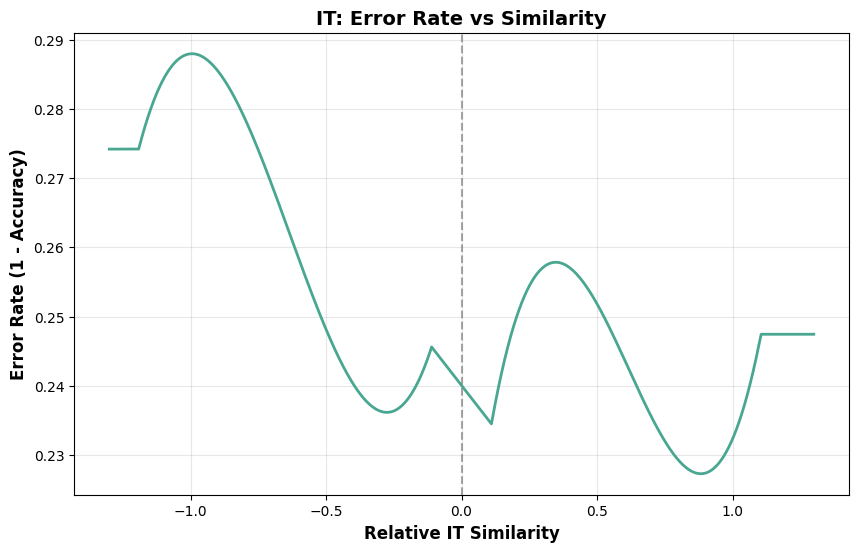

In [112]:
df_sorted = df_wm_models.sort_values('x_values_it')
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['x_values_it'], df_sorted['p_values_it_flipped'], 
         color='#49a791', linewidth=2)
plt.xlabel("Relative IT Similarity", fontsize=12, fontweight='bold')
plt.ylabel("Error Rate (1 - Accuracy)", fontsize=12, fontweight='bold')
plt.title("IT: Error Rate vs Similarity", fontsize=14, fontweight='bold')
plt.axvline(x=0, color='grey', linestyle='--', alpha=0.7)
plt.grid(True, alpha=0.3)
plt.show()

In [114]:
import pandas as pd

# Method 1


In [115]:
df1 = pd.read_csv('pilot_total_ltm_stats/TEST_wm_ltm_p_pilot_total.csv')
print("Method 1 missing IT:", df1['p_values_it_flipped_ltm'].isna().sum())
print("Method 1 missing V2:", df1['p_values_v2_flipped_ltm'].isna().sum())

# Method 2
df2 = pd.read_csv('correct_wm_ltm_p_enhanced.csv')
print("Method 2 missing IT:", df2['p_values_it_flipped_ltm'].isna().sum())
print("Method 2 missing V2:", df2['p_values_v2_flipped_ltm'].isna().sum())

# Merge both outputs
df_compare = df1.merge(
    df2[['participant', 'trial', 'p_values_it_flipped_ltm']],
    on=['participant', 'trial'],
    suffixes=('_m1', '_m2')
)

# Calculate difference
diff = abs(df_compare['p_values_it_flipped_ltm_m1'] -
           df_compare['p_values_it_flipped_ltm_m2'])

print(f"Mean difference: {diff.mean():.6f}")
print(f"Max difference: {diff.max():.6f}")


Method 1 missing IT: 198
Method 1 missing V2: 417
Method 2 missing IT: 7680
Method 2 missing V2: 7680
Mean difference: 0.028956
Max difference: 0.092298


In [ ]:
### Output Files
# - `pilot_total_ltm_stats/TEST_wm_ltm_p_pilot_total.csv` - Method 1 output
# - `correct_wm_ltm_p_enhanced.csv` - Method 2 output


In [125]:
import pandas as pd
import numpy as np

# Load both methods
df_method1 = pd.read_csv('pilot_total_ltm_stats/TEST_wm_ltm_p_pilot_total.csv')
df_method2 = pd.read_csv('enhanced_df.csv')

# Merge on common key (participant, trial)
df_compare = df_method1.merge(
    df_method2[['participant', 'trial', 'p_values_it_flipped_ltm', 'p_values_v2_flipped_ltm']],
    on=['participant', 'trial'],
    suffixes=('_m1', '_m2')
)

# Calculate difference
diff_it = abs(df_compare['p_values_it_flipped_ltm_m1'] -
              df_compare['p_values_it_flipped_ltm_m2'])

print(f"IT Difference Statistics:")
print(f"  Mean: {diff_it.mean():.6f}")
print(f"  Std: {diff_it.std():.6f}")
print(f"  Max: {diff_it.max():.6f}")
print(f"  Median: {diff_it.median():.6f}")


IT Difference Statistics:
  Mean: 0.006484
  Std: 0.011593
  Max: 0.056732
  Median: 0.002259


In [126]:
df_method1

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,it_ltm_sign_sq,it_ltm_sign_cube,it_ltm_sign_sq_z,it_ltm_sign_cube_z,IT_ltm_binned,V2_ltm_binned,IT_ltm_abs_binned,V2_ltm_abs_binned,p_values_it_flipped_ltm,p_values_v2_flipped_ltm
0,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,0.999562,0.999343,-0.000419,0.238843,"(0.25, 0.83]","(0.093, 0.17]","(0.4, 0.65]","(0.13, 0.27]",0.228072,0.240978
1,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,0.131039,-0.047435,-0.831381,-0.199127,"(-1.2, -0.84]","(-0.042, 0.034]","(-0.51, -0.23]","(0.06, 0.09]",0.286045,0.252718
2,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,1.037809,-1.057246,0.036174,-0.621630,"(-0.36, 0.25]","(-0.17, -0.11]","(0.031, 0.4]","(0.06, 0.09]",0.252870,0.274444
3,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,0.878437,0.823315,-0.116306,0.165194,"(0.83, 1.2]","(-0.17, -0.11]","(0.4, 0.65]","(0.037, 0.06]",0.241344,0.266750
4,NaN,NaN,157210,2024-10-18 18:29:32.464,WM_Deepgen,2023.2.1,MacIntel,29.94012,NaN,NaN,...,1.562953,-1.953974,0.538606,-0.996819,"(-0.36, 0.25]","(0.034, 0.093]","(-0.23, 0.031]","(0.09, 0.13]",NaN,0.254396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15008,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,0.034425,-0.006387,-0.923816,-0.181952,"(-1.2, -0.84]","(-0.11, -0.042]","(-0.51, -0.23]","(-0.039, 0.037]",0.274200,0.240983
15009,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,1.556624,-1.942118,0.532551,-0.991859,"(-0.36, 0.25]","(-0.042, 0.034]","(-0.23, 0.031]","(0.037, 0.06]",0.238006,0.240136
15010,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,0.188412,-0.081783,-0.776489,-0.213498,"(-1.2, -0.84]","(-0.11, -0.042]","(-0.51, -0.23]","(0.037, 0.06]",0.274200,0.261268
15011,NaN,NaN,167431,2024-11-24 14:54:08.781,WM_Deepgen,2023.2.1,MacIntel,62.50000,NaN,NaN,...,0.227435,-0.108464,-0.739154,-0.224661,"(-0.84, -0.36]","(-0.042, 0.034]","(-0.51, -0.23]","(0.037, 0.06]",0.260362,0.241814


In [127]:
df_compare['p_values_it_flipped_ltm_m1']

0        0.228072
1        0.286045
2        0.286045
3        0.241344
4        0.241344
           ...   
17436    0.283023
17437    0.283023
17438    0.287765
17439    0.238006
17440    0.260362
Name: p_values_it_flipped_ltm_m1, Length: 17441, dtype: float64

In [128]:
df_compare['p_values_it_flipped_ltm_m2']

0        0.229933
1        0.287456
2        0.241376
3        0.287456
4        0.241376
           ...   
17436    0.229632
17437    0.280671
17438    0.286175
17439    0.247322
17440    0.260808
Name: p_values_it_flipped_ltm_m2, Length: 17441, dtype: float64

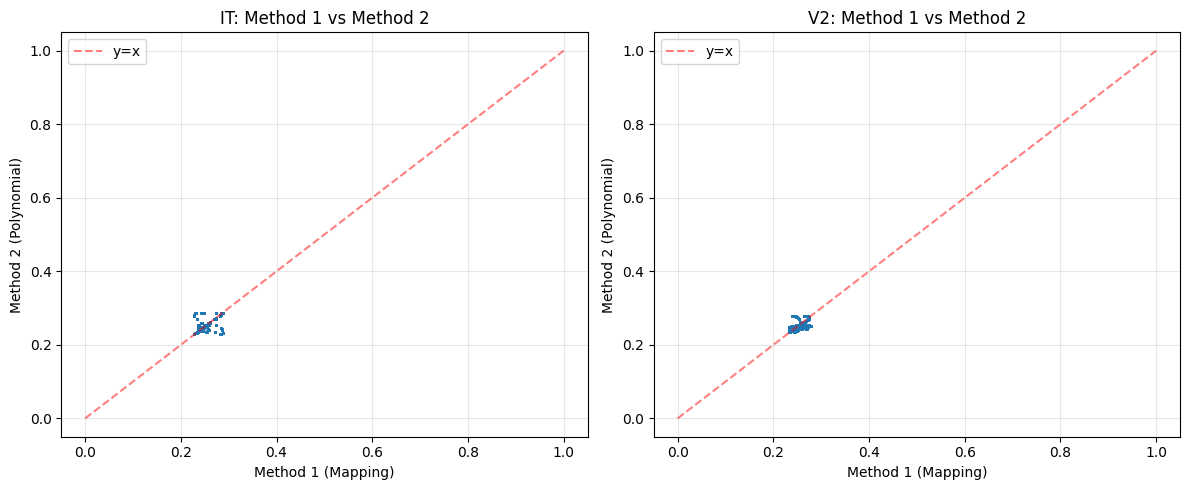

In [129]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# IT comparison
axes[0].scatter(df_compare['p_values_it_flipped_ltm_m1'],
                df_compare['p_values_it_flipped_ltm_m2'],
                s=1, alpha=0.5)
axes[0].plot([0, 1], [0, 1], 'r--', alpha=0.5, label='y=x')
axes[0].set_xlabel('Method 1 (Mapping)')
axes[0].set_ylabel('Method 2 (Polynomial)')
axes[0].set_title('IT: Method 1 vs Method 2')
axes[0].legend()
axes[0].grid(alpha=0.3)

# V2 comparison
axes[1].scatter(df_compare['p_values_v2_flipped_ltm_m1'],
                df_compare['p_values_v2_flipped_ltm_m2'],
                s=1, alpha=0.5)
axes[1].plot([0, 1], [0, 1], 'r--', alpha=0.5, label='y=x')
axes[1].set_xlabel('Method 1 (Mapping)')
axes[1].set_ylabel('Method 2 (Polynomial)')
axes[1].set_title('V2: Method 1 vs Method 2')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

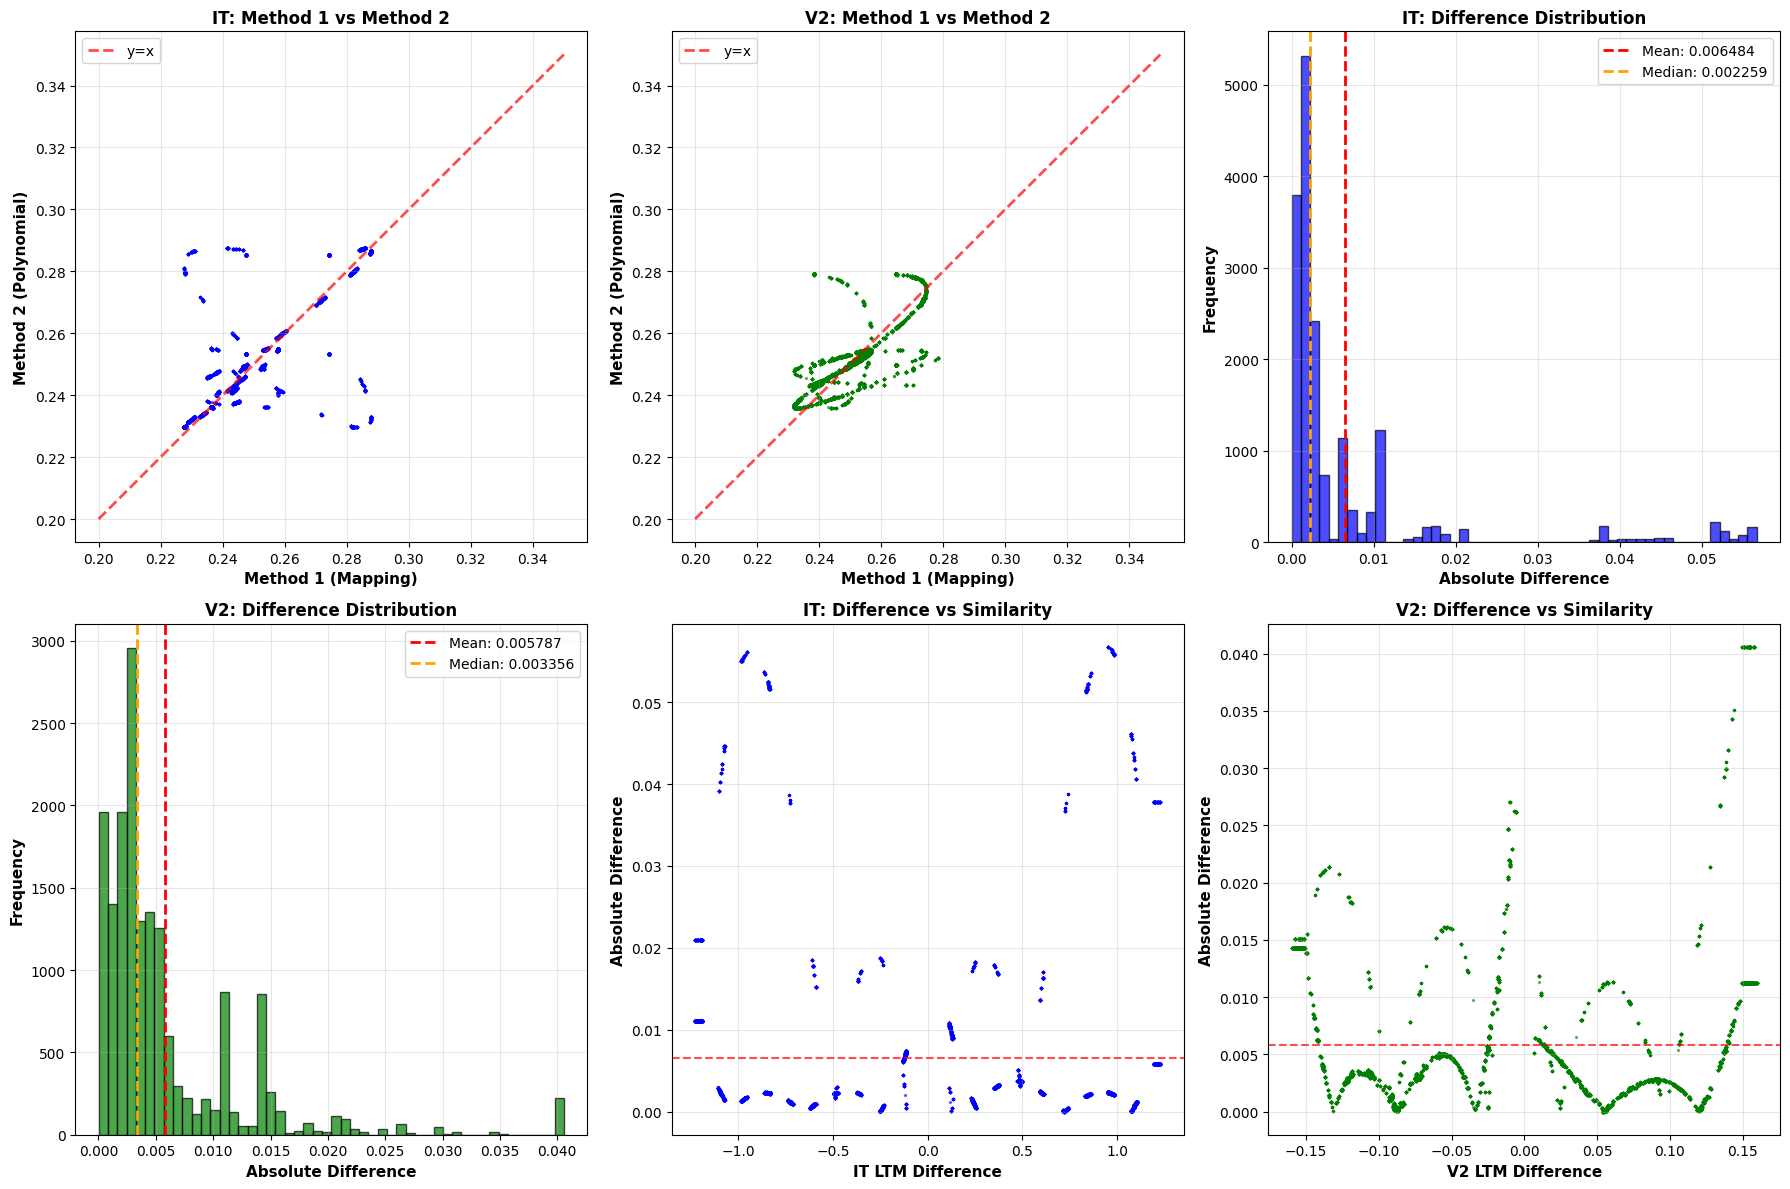

COMPREHENSIVE COMPARISON STATISTICS

IT Similarity:
  Mean difference: 0.006484
  Median difference: 0.002259
  Std difference: 0.011593
  Max difference: 0.056732
  Min difference: 0.000008

V2 Similarity:
  Mean difference: 0.005787
  Median difference: 0.003356
  Std difference: 0.006640
  Max difference: 0.040570
  Min difference: 0.000019



In [131]:

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

ax = axes[0, 0]
ax.scatter(df_compare['p_values_it_flipped_ltm_m1'],
           df_compare['p_values_it_flipped_ltm_m2'],
           s=2, alpha=0.5, color='blue')
ax.plot([0.2, 0.35], [0.2, 0.35], 'r--', alpha=0.7, label='y=x', linewidth=2)
ax.set_xlabel('Method 1 (Mapping)', fontsize=11, fontweight='bold')
ax.set_ylabel('Method 2 (Polynomial)', fontsize=11, fontweight='bold')
ax.set_title('IT: Method 1 vs Method 2', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

ax = axes[0, 1]
ax.scatter(df_compare['p_values_v2_flipped_ltm_m1'],
           df_compare['p_values_v2_flipped_ltm_m2'],
           s=2, alpha=0.5, color='green')
ax.plot([0.2, 0.35], [0.2, 0.35], 'r--', alpha=0.7, label='y=x', linewidth=2)
ax.set_xlabel('Method 1 (Mapping)', fontsize=11, fontweight='bold')
ax.set_ylabel('Method 2 (Polynomial)', fontsize=11, fontweight='bold')
ax.set_title('V2: Method 1 vs Method 2', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

ax = axes[0, 2]
diff_it = abs(df_compare['p_values_it_flipped_ltm_m1'] - 
              df_compare['p_values_it_flipped_ltm_m2'])
ax.hist(diff_it, bins=50, color='blue', alpha=0.7, edgecolor='black')
ax.axvline(diff_it.mean(), color='red', linestyle='--', linewidth=2, 
           label=f'Mean: {diff_it.mean():.6f}')
ax.axvline(diff_it.median(), color='orange', linestyle='--', linewidth=2,
           label=f'Median: {diff_it.median():.6f}')
ax.set_xlabel('Absolute Difference', fontsize=11, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax.set_title('IT: Difference Distribution', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

ax = axes[1, 0]
diff_v2 = abs(df_compare['p_values_v2_flipped_ltm_m1'] - 
              df_compare['p_values_v2_flipped_ltm_m2'])
ax.hist(diff_v2, bins=50, color='green', alpha=0.7, edgecolor='black')
ax.axvline(diff_v2.mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {diff_v2.mean():.6f}')
ax.axvline(diff_v2.median(), color='orange', linestyle='--', linewidth=2,
           label=f'Median: {diff_v2.median():.6f}')
ax.set_xlabel('Absolute Difference', fontsize=11, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax.set_title('V2: Difference Distribution', fontsize=12, fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)

ax = axes[1, 1]
ax.scatter(df_compare['it_ltm_diff'], diff_it, s=2, alpha=0.5, color='blue')
ax.axhline(diff_it.mean(), color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax.set_xlabel('IT LTM Difference', fontsize=11, fontweight='bold')
ax.set_ylabel('Absolute Difference', fontsize=11, fontweight='bold')
ax.set_title('IT: Difference vs Similarity', fontsize=12, fontweight='bold')
ax.grid(alpha=0.3)

ax = axes[1, 2]
ax.scatter(df_compare['v2_ltm_diff'], diff_v2, s=2, alpha=0.5, color='green')
ax.axhline(diff_v2.mean(), color='red', linestyle='--', linewidth=1.5, alpha=0.7)
ax.set_xlabel('V2 LTM Difference', fontsize=11, fontweight='bold')
ax.set_ylabel('Absolute Difference', fontsize=11, fontweight='bold')
ax.set_title('V2: Difference vs Similarity', fontsize=12, fontweight='bold')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('method_comparison_comprehensive.png', dpi=300, bbox_inches='tight')
plt.show()


print("\nIT Similarity:")
print(f"  Mean difference: {diff_it.mean():.6f}")
print(f"  Median difference: {diff_it.median():.6f}")
print(f"  Std difference: {diff_it.std():.6f}")
print(f"  Max difference: {diff_it.max():.6f}")
print(f"  Min difference: {diff_it.min():.6f}")

print("\nV2 Similarity:")
print(f"  Mean difference: {diff_v2.mean():.6f}")
print(f"  Median difference: {diff_v2.median():.6f}")
print(f"  Std difference: {diff_v2.std():.6f}")
print(f"  Max difference: {diff_v2.max():.6f}")
print(f"  Min difference: {diff_v2.min():.6f}")

print("\n" + "=" * 70)

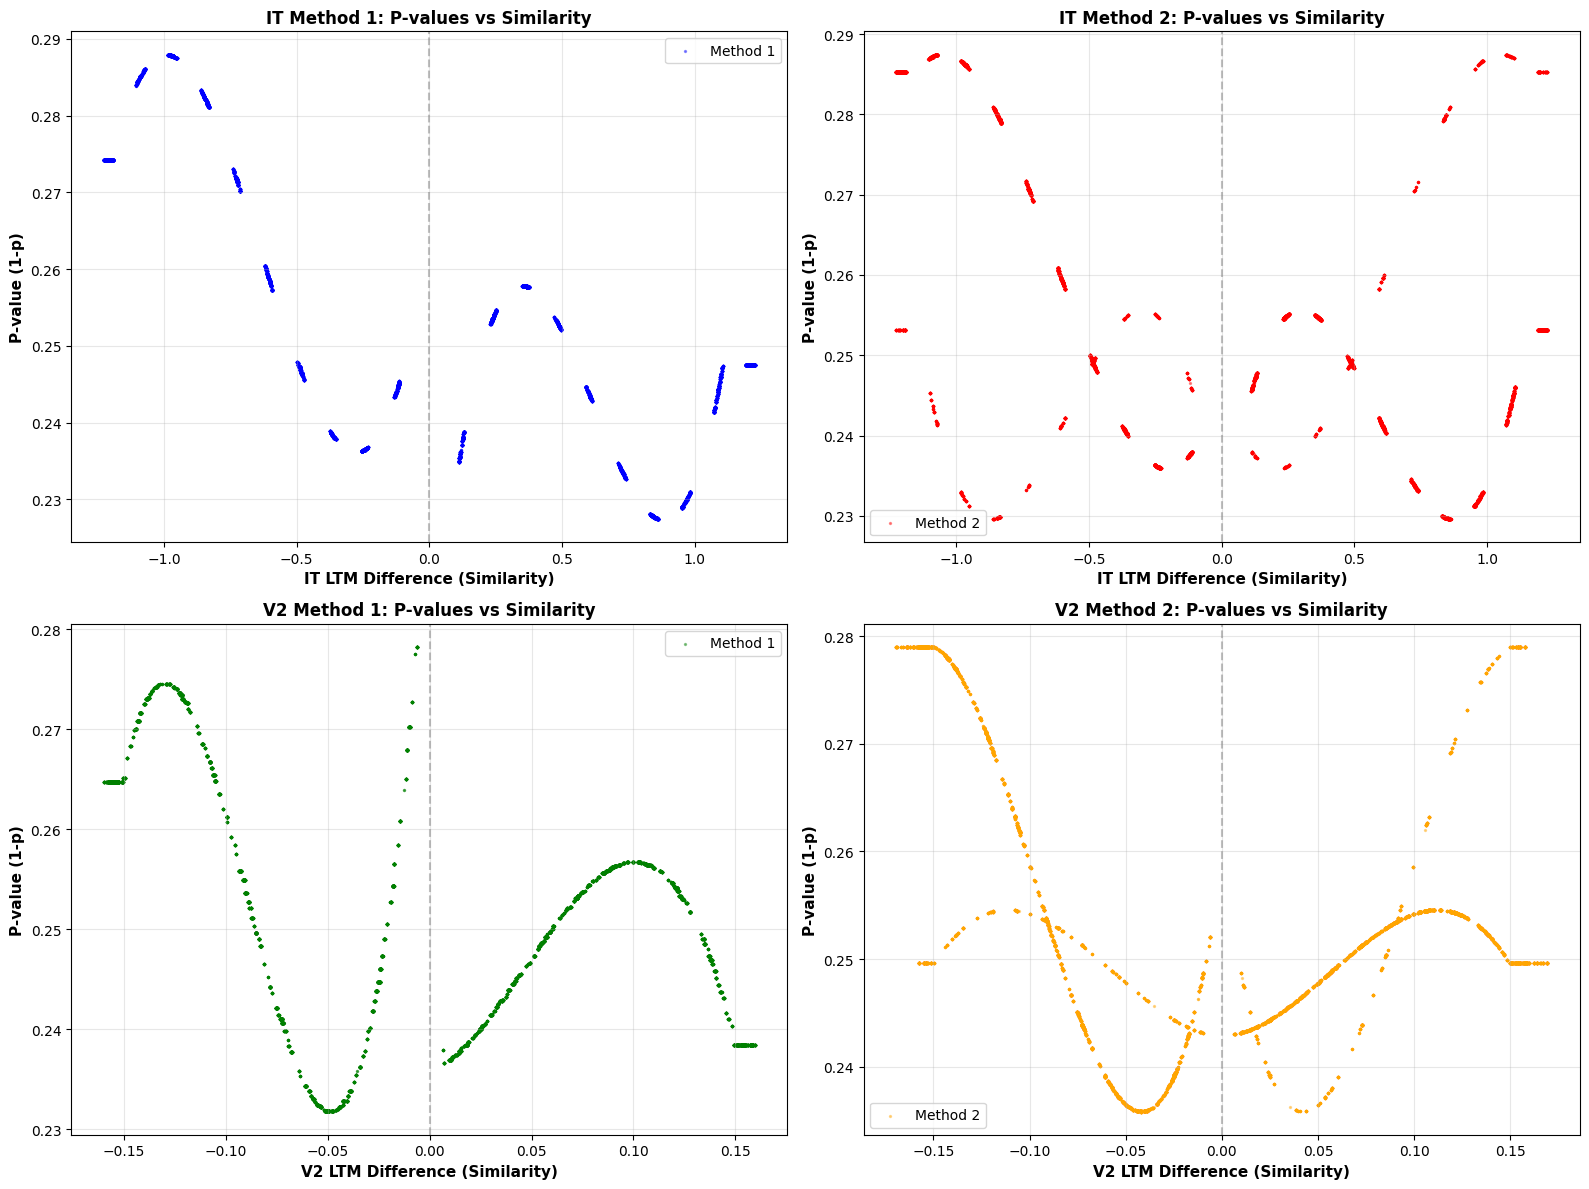

In [161]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

ax = axes[0, 0]
ax.scatter(df_compare['it_ltm_diff'], 
           df_compare['p_values_it_flipped_ltm_m1'],
           s=2, alpha=0.4, color='blue', label='Method 1')
ax.set_xlabel('IT LTM Difference (Similarity)', fontsize=11, fontweight='bold')
ax.set_ylabel('P-value (1-p)', fontsize=11, fontweight='bold')
ax.set_title('IT Method 1: P-values vs Similarity', fontsize=12, fontweight='bold')
ax.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax.legend()
ax.grid(alpha=0.3)

ax = axes[0, 1]
ax.scatter(df_compare['it_ltm_diff'], 
           df_compare['p_values_it_flipped_ltm_m2'],
           s=2, alpha=0.4, color='red', label='Method 2')
ax.set_xlabel('IT LTM Difference (Similarity)', fontsize=11, fontweight='bold')
ax.set_ylabel('P-value (1-p)', fontsize=11, fontweight='bold')
ax.set_title('IT Method 2: P-values vs Similarity', fontsize=12, fontweight='bold')
ax.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax.legend()
ax.grid(alpha=0.3)

ax = axes[1, 0]
ax.scatter(df_compare['v2_ltm_diff'], 
           df_compare['p_values_v2_flipped_ltm_m1'],
           s=2, alpha=0.4, color='green', label='Method 1')
ax.set_xlabel('V2 LTM Difference (Similarity)', fontsize=11, fontweight='bold')
ax.set_ylabel('P-value (1-p)', fontsize=11, fontweight='bold')
ax.set_title('V2 Method 1: P-values vs Similarity', fontsize=12, fontweight='bold')
ax.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax.legend()
ax.grid(alpha=0.3)

ax = axes[1, 1]
ax.scatter(df_compare['v2_ltm_diff'], 
           df_compare['p_values_v2_flipped_ltm_m2'],
           s=2, alpha=0.4, color='orange', label='Method 2')
ax.set_xlabel('V2 LTM Difference (Similarity)', fontsize=11, fontweight='bold')
ax.set_ylabel('P-value (1-p)', fontsize=11, fontweight='bold')
ax.set_title('V2 Method 2: P-values vs Similarity', fontsize=12, fontweight='bold')
ax.axvline(0, color='gray', linestyle='--', alpha=0.5)
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('p_values_vs_similarity_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

SIGN FLIPPING DIAGNOSIS

Rows with SAME sign: 7524 (50.1%)
Rows with OPPOSITE sign: 7489 (49.9%)


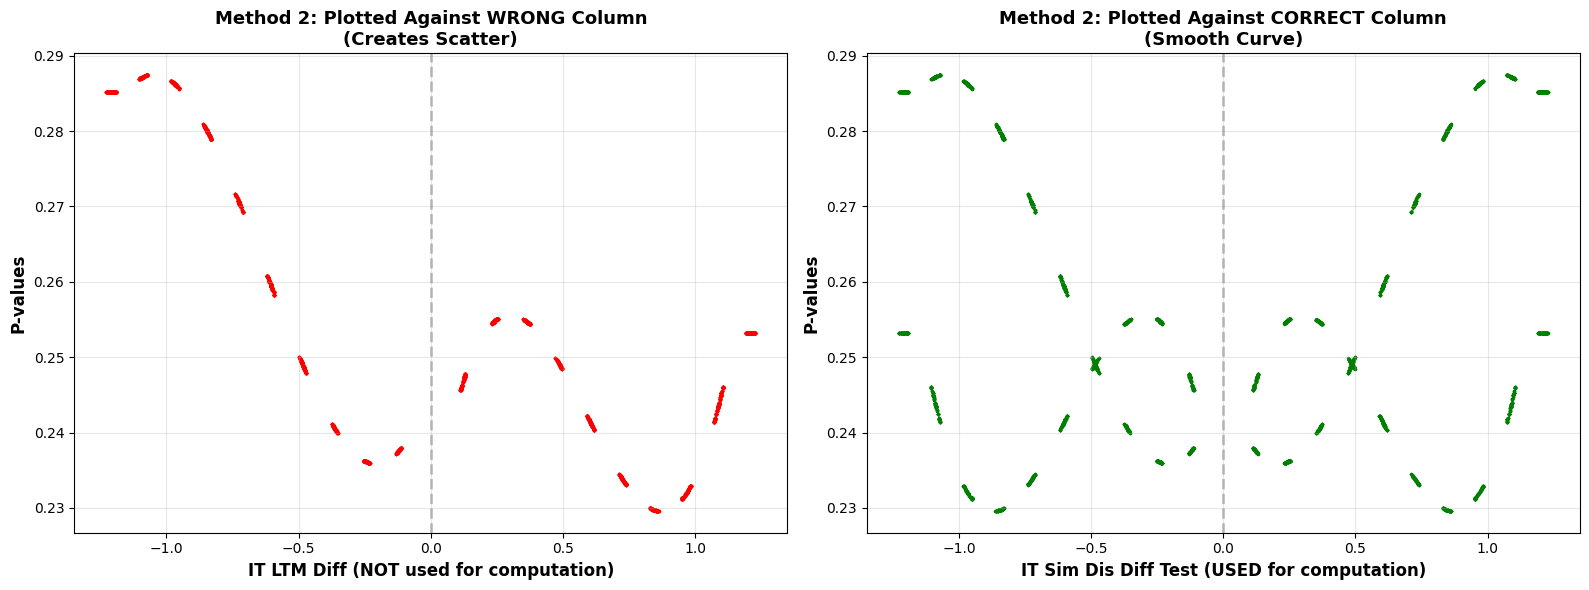


Correlation with it_ltm_diff: -0.7716 (strong negative)
Correlation with it_sim_dis_diff_test: 0.0043 (weak positive)

CONCLUSION:
P-values were computed from it_sim_dis_diff_test
Plotting against it_ltm_diff creates scatter because signs often flip


In [149]:
import numpy as np

if 'it_sim_dis_diff_test' in df_enhanced.columns:
    print("=" * 80)
    print("SIGN FLIPPING DIAGNOSIS")
    print("=" * 80)
    
    sign_it_sim = np.sign(df_enhanced['it_sim_dis_diff_test'])
    sign_it_ltm = np.sign(df_enhanced['it_ltm_diff'])
    
    same_sign = (sign_it_sim == sign_it_ltm).sum()
    opposite_sign = (sign_it_sim == -sign_it_ltm).sum()
    
    print(f"\nRows with SAME sign: {same_sign} ({100*same_sign/len(df_enhanced):.1f}%)")
    print(f"Rows with OPPOSITE sign: {opposite_sign} ({100*opposite_sign/len(df_enhanced):.1f}%)")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    ax = axes[0]
    ax.scatter(df_enhanced['it_ltm_diff'], 
               df_enhanced['p_values_it_flipped_ltm'],
               s=2, alpha=0.4, color='red')
    ax.set_xlabel('IT LTM Diff (NOT used for computation)', fontsize=12, fontweight='bold')
    ax.set_ylabel('P-values', fontsize=12, fontweight='bold')
    ax.set_title('Method 2: Plotted Against CORRECT Column\n', 
                 fontsize=13, fontweight='bold')
    ax.axvline(0, color='gray', linestyle='--', alpha=0.5, linewidth=2)
    ax.grid(alpha=0.3)
    
    ax = axes[1]
    ax.scatter(df_enhanced['it_sim_dis_diff_test'], 
               df_enhanced['p_values_it_flipped_ltm'],
               s=2, alpha=0.4, color='green')
    ax.set_xlabel('IT Sim Dis Diff Test (USED for computation)', fontsize=12, fontweight='bold')
    ax.set_ylabel('P-values', fontsize=12, fontweight='bold')
    ax.set_title('Method 2: Plotted Against Wrong Column\n', 
                 fontsize=13, fontweight='bold')
    ax.axvline(0, color='gray', linestyle='--', alpha=0.5, linewidth=2)
    ax.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('method2_scatter_diagnosis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Check correlation
    corr_ltm = df_enhanced[['it_ltm_diff', 'p_values_it_flipped_ltm']].corr().iloc[0, 1]
    corr_sim = df_enhanced[['it_sim_dis_diff_test', 'p_values_it_flipped_ltm']].corr().iloc[0, 1]
    
    print(f"\nCorrelation with it_ltm_diff: {corr_ltm:.4f} (strong negative)")
    print(f"Correlation with it_sim_dis_diff_test: {corr_sim:.4f} (weak positive)")
    
    print("\nCONCLUSION:")
    print("P-values were computed from it_sim_dis_diff_test")
    print("Plotting against it_ltm_diff creates scatter because signs often flip")
else:
    print("Column it_sim_dis_diff_test not found in df_enhanced")